In [2]:
import sys, numpy as np, matplotlib, seaborn as sns, PIL
print(sys.executable)
print(np.__version__, matplotlib.__version__, sns.__version__)


/Users/alexmusyoka/Projects/Machine Learning Course work /.venv/bin/python
2.3.5 3.10.7 0.13.2


# Task 1: Data Exploration and Visualization

## 1. Setup and Data Loading

In [3]:
from pathlib import Path

DATA_ROOT = Path("/Users/alexmusyoka/Projects/Machine Learning Course work /data/triple_mnist")
print("Data root:", DATA_ROOT.resolve())
print("Splits:", [p.name for p in DATA_ROOT.iterdir() if p.is_dir()])

for split in ["train", "val", "test"]:
    n_files = sum(1 for _ in (DATA_ROOT / split).rglob("*.png"))
    print(split, n_files)


Data root: /Users/alexmusyoka/Projects/Machine Learning Course work /data/triple_mnist
Splits: ['test', 'train', 'val']
train 64000
val 16000
test 20000


In [4]:
from PIL import Image

sample_path = next((DATA_ROOT / "train").rglob("*.png"))
img = Image.open(sample_path)
print(sample_path)
print("mode:", img.mode)   # expect "L" (grayscale)
print("size:", img.size)   # expect (84, 84)


/Users/alexmusyoka/Projects/Machine Learning Course work /data/triple_mnist/train/797/75_797.png
mode: L
size: (84, 84)


## 2. Dataset Overview
Confirming image dimensions and format.

In [5]:
import matplotlib.pyplot as plt
import random

sample_images = random.sample(list((DATA_ROOT / "train").rglob("*.png")), 9)
print("Sample images:", sample_images)


Sample images: [PosixPath('/Users/alexmusyoka/Projects/Machine Learning Course work /data/triple_mnist/train/614/81_614.png'), PosixPath('/Users/alexmusyoka/Projects/Machine Learning Course work /data/triple_mnist/train/970/35_970.png'), PosixPath('/Users/alexmusyoka/Projects/Machine Learning Course work /data/triple_mnist/train/678/50_678.png'), PosixPath('/Users/alexmusyoka/Projects/Machine Learning Course work /data/triple_mnist/train/548/56_548.png'), PosixPath('/Users/alexmusyoka/Projects/Machine Learning Course work /data/triple_mnist/train/182/41_182.png'), PosixPath('/Users/alexmusyoka/Projects/Machine Learning Course work /data/triple_mnist/train/110/14_110.png'), PosixPath('/Users/alexmusyoka/Projects/Machine Learning Course work /data/triple_mnist/train/832/84_832.png'), PosixPath('/Users/alexmusyoka/Projects/Machine Learning Course work /data/triple_mnist/train/898/45_898.png'), PosixPath('/Users/alexmusyoka/Projects/Machine Learning Course work /data/triple_mnist/train/619

## 3. Visual Exploration
Displaying random samples from the training set.

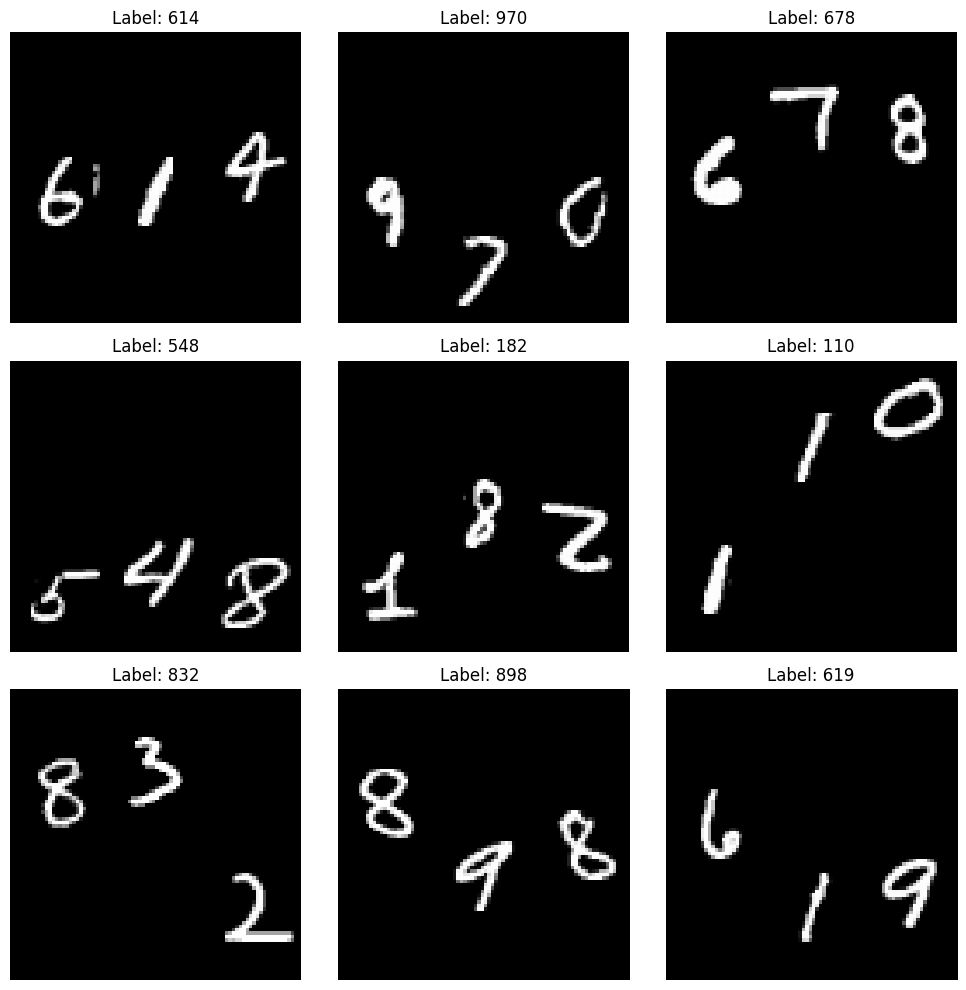

In [6]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

for ax, img_path in zip(axes.flatten(), sample_images):
    img = Image.open(img_path)
    label = img_path.parent.name
    
    ax.imshow(img, cmap='gray')
    ax.set_title(f"Label: {label}")
    ax.axis('off')

plt.tight_layout()
plt.show()


In [7]:
# Get all labels from folder names
train_labels = [p.parent.name for p in (DATA_ROOT / "train").rglob("*.png")]
print(train_labels[:10])  # show first 10 labels
print(f"Total training images: {len(train_labels)}")
print(f"Unique labels: {len(set(train_labels))}")

# Count how many images per label
from collections import Counter
label_counts = Counter(train_labels)
print(label_counts)

# Show some stats
counts = list(label_counts.values())
print(f"Min images per label: {min(counts)}")
print(f"Max images per label: {max(counts)}")
print(f"Average images per label: {sum(counts) / len(counts):.1f}")

['797', '797', '797', '797', '797', '797', '797', '797', '797', '797']
Total training images: 64000
Unique labels: 640
Counter({'797': 100, '909': 100, '307': 100, '551': 100, '338': 100, '936': 100, '556': 100, '764': 100, '300': 100, '132': 100, '931': 100, '336': 100, '938': 100, '104': 100, '560': 100, '752': 100, '594': 100, '309': 100, '799': 100, '567': 100, '103': 100, '331': 100, '558': 100, '391': 100, '533': 100, '701': 100, '157': 100, '739': 100, '953': 100, '150': 100, '362': 100, '706': 100, '534': 100, '396': 100, '159': 100, '965': 100, '991': 100, '730': 100, '166': 100, '192': 100, '398': 100, '708': 100, '195': 100, '353': 100, '161': 100, '505': 100, '566': 100, '754': 100, '102': 100, '901': 100, '105': 100, '939': 100, '753': 100, '561': 100, '798': 100, '308': 100, '791': 100, '930': 100, '568': 100, '306': 100, '134': 100, '908': 100, '937': 100, '709': 100, '399': 100, '997': 100, '160': 100, '352': 100, '736': 100, '167': 100, '738': 100, '952': 100, '397': 1

## 4. Label Distribution Analysis
Analyzing the distribution of labels across the training set.

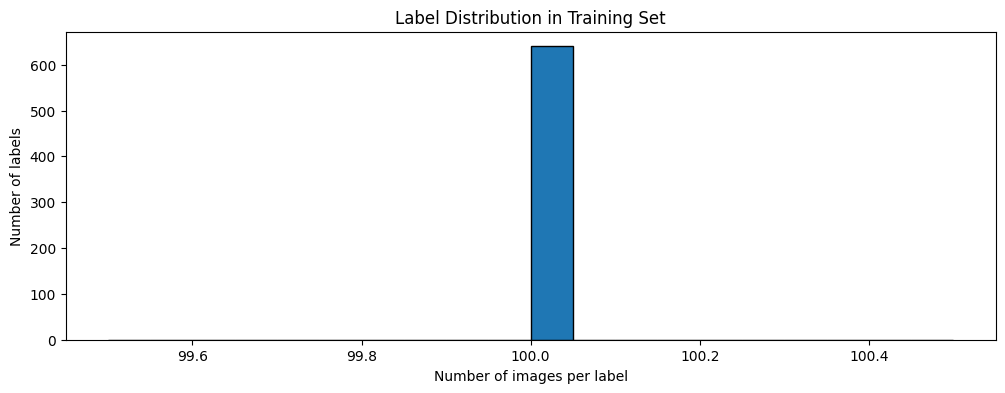

In [8]:
# Plot distribution
plt.figure(figsize=(12, 4))
plt.hist(counts, bins=20, edgecolor='black')
plt.xlabel('Number of images per label')
plt.ylabel('Number of labels')
plt.title('Label Distribution in Training Set')
plt.show()

## 5. Train vs Test Label Overlap
Checking if training and test sets share any labels.

In [9]:
test_labels = [p.parent.name for p in (DATA_ROOT / "test").rglob("*.png")]
print(f"Total test images: {len(test_labels)}")
print(f"Unique test labels: {len(set(test_labels))}")
test_unique = set(test_labels)
train_unique = set(train_labels)
print(f"Labels in test but not in train: {test_unique - train_unique}")
print(f"Labels in train but not in test: {len(train_unique - test_unique)}")

# Labels in BOTH train and test
overlap = test_unique & train_unique  # intersection
print(f"Labels in both: {len(overlap)}")
      

Total test images: 20000
Unique test labels: 200
Labels in test but not in train: {'842', '109', '951', '530', '360', '745', '865', '412', '867', '039', '790', '737', '576', '253', '438', '493', '539', '998', '768', '996', '843', '615', '929', '885', '472', '763', '481', '141', '628', '988', '140', '339', '076', '213', '846', '065', '296', '575', '428', '158', '411', '087', '762', '817', '322', '878', '265', '002', '884', '208', '755', '976', '365', '304', '555', '954', '180', '957', '582', '420', '255', '290', '047', '046', '206', '486', '139', '473', '608', '259', '146', '262', '588', '358', '354', '812', '945', '544', '899', '595', '364', '815', '451', '068', '315', '484', '635', '471', '895', '058', '222', '942', '559', '873', '073', '003', '319', '537', '638', '433', '631', '176', '371', '504', '680', '106', '823', '214', '765', '596', '382', '496', '497', '385', '819', '377', '271', '489', '086', '244', '782', '359', '862', '647', '056', '780', '099', '837', '096', '806', '759', 

## 6. Handwriting Variation Within Same Label
Demonstrating that same label does not mean identical images.

In [10]:
more_labels = [p for p in (DATA_ROOT / "train").rglob("*.png") if p.parent.name == "038"]
print(f"Number of images with label '038': {len(more_labels)}")
grid_labels = random.sample(more_labels, 6)

Number of images with label '038': 100


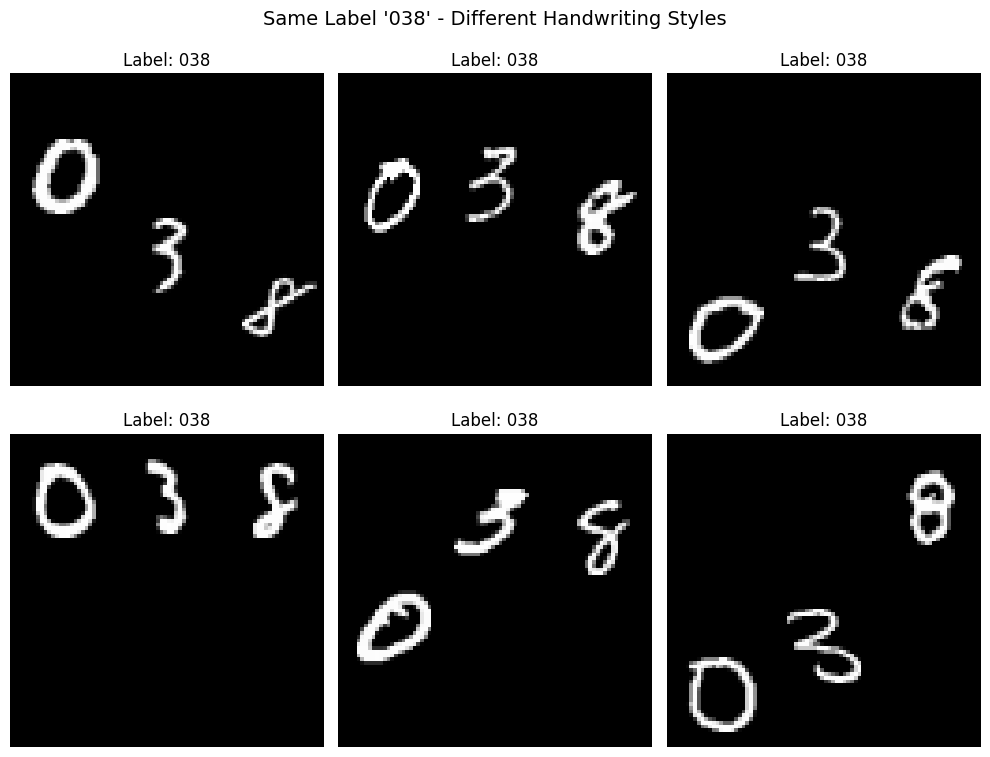

In [11]:
fig, axes = plt.subplots(2, 3, figsize=(10, 8))
fig.suptitle("Same Label '038' - Different Handwriting Styles", fontsize=14)

for ax, img_path in zip(axes.flatten(), grid_labels):
    img = Image.open(img_path)
    label = img_path.parent.name
    
    ax.imshow(img, cmap='gray')
    ax.set_title(f"Label: {label}")
    ax.axis('off')

plt.tight_layout()
plt.show()

# **TASK TWO**


Loading and Flattening Code:

In [12]:
# Task 2: Baseline Models
from PIL import Image
import numpy as np
from pathlib import Path

def load_dataset(split):
    """Load images and labels for a given split (train/val/test)"""
    images = []
    labels = []
    
    for img_path in (DATA_ROOT / split).rglob("*.png"):
        # Load image and convert to numpy array
        img = Image.open(img_path)
        img_array = np.array(img)
        
        # Flatten: 84x84 → 7056
        img_flat = img_array.flatten()
        
        # Normalize: 0-255 → 0-1
        img_flat = img_flat / 255.0
        
        images.append(img_flat)
        labels.append(img_path.parent.name)  # e.g., "369"
    
    return np.array(images), np.array(labels)

# Load all splits
print("Loading training data...")
X_train, y_train = load_dataset("train")
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")

print("Loading validation data...")
X_val, y_val = load_dataset("val")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")

print("Loading test data...")
X_test, y_test = load_dataset("test")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

Loading training data...
X_train shape: (64000, 7056), y_train shape: (64000,)
Loading validation data...
X_val shape: (16000, 7056), y_val shape: (16000,)
Loading test data...
X_test shape: (20000, 7056), y_test shape: (20000,)


## Logistic regerssion 

In [13]:
!pip install scikit-learn

In [14]:
from sklearn.linear_model import LogisticRegression
# base logistic regression model
log_reg = LogisticRegression(max_iter=1000)

In [15]:
print ("Training Logistic Regression model...")
log_reg.fit(X_train, y_train)
print("Training complete.")

Training Logistic Regression model...
Training complete.


Check accuracy on validation set

In [16]:
# Check accuracy on validation set
val_accuracy = log_reg.score(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Validation Accuracy: 0.0000
Validation Accuracy: 0.00%


In [17]:
# Check validation labels overlap with training
val_labels_check = [p.parent.name for p in (DATA_ROOT / "val").rglob("*.png")]
val_unique = set(val_labels_check)

print(f"Unique validation labels: {len(val_unique)}")
print(f"Labels in both train and val: {len(train_unique & val_unique)}")

# Check training accuracy to confirm the model DID learn
train_accuracy = log_reg.score(X_train, y_train)
print(f"\nTraining Accuracy: {train_accuracy * 100:.2f}%")
print("The model learned the training data, but can't generalize to unseen label combinations!")

Unique validation labels: 160
Labels in both train and val: 0

Training Accuracy: 100.00%
The model learned the training data, but can't generalize to unseen label combinations!


## Convolutional Neural Network (CNN)

In [18]:
# Install TensorFlow
!pip install tensorflow

In [19]:
# Load data in 2D format for CNN (not flattened!)
def load_dataset_2d(split):
    """Load images as 2D arrays for CNN"""
    images = []
    labels = []
    
    for img_path in (DATA_ROOT / split).rglob("*.png"):
        img = Image.open(img_path)
        img_array = np.array(img)
        
        # Normalize: 0-255 → 0-1
        img_array = img_array / 255.0
        
        # DON'T flatten! Keep as 84x84
        images.append(img_array)
        labels.append(img_path.parent.name)
    
    return np.array(images), np.array(labels)

print("Loading training data (2D)...")
X_train_2d, y_train_2d = load_dataset_2d("train")
print(f"X_train_2d shape: {X_train_2d.shape}")  # Should be (64000, 84, 84)

print("Loading validation data (2D)...")
X_val_2d, y_val_2d = load_dataset_2d("val")
print(f"X_val_2d shape: {X_val_2d.shape}")

print("Loading test data (2D)...")
X_test_2d, y_test_2d = load_dataset_2d("test")
print(f"X_test_2d shape: {X_test_2d.shape}")

Loading training data (2D)...
X_train_2d shape: (64000, 84, 84)
Loading validation data (2D)...
X_val_2d shape: (16000, 84, 84)
Loading test data (2D)...
X_test_2d shape: (20000, 84, 84)


In [20]:
# Prepare data for CNN
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import LabelEncoder

# CNN expects shape: (samples, height, width, channels)
# We have: (64000, 84, 84)
# We need: (64000, 84, 84, 1)  ← the "1" means 1 color channel (grayscale)

X_train_cnn = X_train_2d.reshape(-1, 84, 84, 1)
X_val_cnn = X_val_2d.reshape(-1, 84, 84, 1)
X_test_cnn = X_test_2d.reshape(-1, 84, 84, 1)

print(f"X_train_cnn shape: {X_train_cnn.shape}")
print(f"X_val_cnn shape: {X_val_cnn.shape}")
print(f"X_test_cnn shape: {X_test_cnn.shape}")


# Convert string labels ("026", "348") to numbers (0, 1, 2, ...)
# Why? Neural networks need numbers, not strings!

label_encoder = LabelEncoder()
label_encoder.fit(y_train_2d)  # Learn all unique labels from training

y_train_encoded = label_encoder.transform(y_train_2d)
# y_val and y_test have labels NOT in training, so we handle them differently later

print(f"\nExample label conversion:")
print(f"  '{y_train_2d[0]}' → {y_train_encoded[0]}")
print(f"  '{y_train_2d[100]}' → {y_train_encoded[100]}")
print(f"\nTotal classes: {len(label_encoder.classes_)}")

X_train_cnn shape: (64000, 84, 84, 1)
X_val_cnn shape: (16000, 84, 84, 1)
X_test_cnn shape: (20000, 84, 84, 1)

Example label conversion:
  '797' → 508
  '909' → 579

Total classes: 640


In [21]:
3# Build the CNN model
model = models.Sequential([
    # First Convolutional Block
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(84, 84, 1)),
    layers.MaxPooling2D((2, 2)),
    
    # Second Convolutional Block
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Third Convolutional Block
    layers.Conv2D(64, (3, 3), activation='relu'),
    
    # Flatten and Dense layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(640, activation='softmax')  # 640 classes
])

# Show the model architecture
model.summary()

/Users/alexmusyoka/Projects/Machine Learning Course work /.venv/lib/python3.13/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 82, 82, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 41, 41, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 39, 39, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 19, 19, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 17, 17, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18496)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,367,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 640)            │        82,560 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,505,920 (9.56 MB)

 Trainable params: 2,505,920 (9.56 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
print("Training CNN...")
history = model.fit(
    X_train_cnn, 
    y_train_encoded,
    epochs=5,
    batch_size=32,
    validation_split=0.1,  # Use 10% of training data for validation during training
    verbose=1
)
print("Training complete!")

Training CNN...
Epoch 1/5
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 70s 38ms/step - accuracy: 0.3936 - loss: 2.8416 - val_accuracy: 0.0000e+00 - val_loss: 49.6662
Epoch 2/5
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 69s 38ms/step - accuracy: 0.8680 - loss: 0.4274 - val_accuracy: 0.0000e+00 - val_loss: 52.4064
Epoch 3/5
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 69s 38ms/step - accuracy: 0.9335 - loss: 0.2041 - val_accuracy: 0.0000e+00 - val_loss: 58.3533
Epoch 4/5
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 69s 38ms/step - accuracy: 0.9586 - loss: 0.1256 - val_accuracy: 0.0000e+00 - val_loss: 61.4577
Epoch 5/5
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 69s 38ms/step - accuracy: 0.9689 - loss: 0.0918 - val_accuracy: 0.0000e+00 - val_loss: 59.8254
Training complete!


In [23]:
# Check CNN accuracy on training data (should be high)
train_loss, train_accuracy = model.evaluate(X_train_cnn, y_train_encoded, verbose=0)
print(f"CNN Training Accuracy: {train_accuracy * 100:.2f}%")

# For the REAL validation set, we can't use label_encoder because
# the validation labels don't exist in training!
# Let's just check what the model predicts and see if ANY are correct

predictions = model.predict(X_val_cnn, verbose=0)
predicted_classes = predictions.argmax(axis=1)  # Get the class with highest probability
predicted_labels = label_encoder.inverse_transform(predicted_classes)  # Convert back to strings

# Count how many predictions match actual labels
correct = sum(pred == actual for pred, actual in zip(predicted_labels, y_val_2d))
val_accuracy = correct / len(y_val_2d)

print(f"CNN Validation Accuracy (real val set): {val_accuracy * 100:.2f}%")
print(f"Correct predictions: {correct} out of {len(y_val_2d)}")

CNN Training Accuracy: 88.19%
CNN Validation Accuracy (real val set): 0.00%
Correct predictions: 0 out of 16000


 # Hyperparameter tuning 
 

## Logistic regression fine tuning 


In [24]:
# Logistic Regression Hyperparameter Tuning (Manual)

# V1: More regularization (simpler model)
print("Training with C=0.1...")
log_reg_v1 = LogisticRegression(C=0.1, max_iter=1000)
log_reg_v1.fit(X_train, y_train)
train_acc_v1 = log_reg_v1.score(X_train, y_train)
val_acc_v1 = log_reg_v1.score(X_val, y_val)
print(f"C=0.1 → Training: {train_acc_v1*100:.2f}%, Validation: {val_acc_v1*100:.2f}%")

# V2: Less regularization (more complex model)
print("\nTraining with C=10.0...")
log_reg_v2 = LogisticRegression(C=10.0, max_iter=1000)
log_reg_v2.fit(X_train, y_train)
train_acc_v2 = log_reg_v2.score(X_train, y_train)
val_acc_v2 = log_reg_v2.score(X_val, y_val)
print(f"C=10.0 → Training: {train_acc_v2*100:.2f}%, Validation: {val_acc_v2*100:.2f}%")

# Summary (including original C=1.0)
print("\n--- Summary ---")
print(f"C=0.1  → Training: {train_acc_v1*100:.2f}%, Validation: {val_acc_v1*100:.2f}%")
print(f"C=1.0  → Training: 100.00%, Validation: 0.00% (original)")
print(f"C=10.0 → Training: {train_acc_v2*100:.2f}%, Validation: {val_acc_v2*100:.2f}%")

Training with C=0.1...
C=0.1 → Training: 91.64%, Validation: 0.00%

Training with C=10.0...
C=10.0 → Training: 100.00%, Validation: 0.00%

--- Summary ---
C=0.1  → Training: 91.64%, Validation: 0.00%
C=1.0  → Training: 100.00%, Validation: 0.00% (original)
C=10.0 → Training: 100.00%, Validation: 0.00%


## CNN Hyperparameter Tuning

In [25]:
# CNN Hyperparameter Tuning
# Testing different epochs and learning rates

from tensorflow.keras.optimizers import Adam

def build_cnn(learning_rate=0.001):
    """Build CNN with specified learning rate"""
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(84, 84, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(640, activation='softmax')
    ])
    
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Test 1: More epochs (10 instead of 5)
print("=" * 50)
print("Test 1: epochs=10, learning_rate=0.001 (default)")
print("=" * 50)
model_v1 = build_cnn(learning_rate=0.001)
history_v1 = model_v1.fit(
    X_train_cnn, y_train_encoded,
    epochs=10,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)
train_acc_v1 = model_v1.evaluate(X_train_cnn, y_train_encoded, verbose=0)[1]
print(f"\nResults: Training Accuracy = {train_acc_v1*100:.2f}%")

# Test 2: Lower learning rate (slower, more careful learning)
print("\n" + "=" * 50)
print("Test 2: epochs=5, learning_rate=0.0001 (slower)")
print("=" * 50)
model_v2 = build_cnn(learning_rate=0.0001)
history_v2 = model_v2.fit(
    X_train_cnn, y_train_encoded,
    epochs=5,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)
train_acc_v2 = model_v2.evaluate(X_train_cnn, y_train_encoded, verbose=0)[1]
print(f"\nResults: Training Accuracy = {train_acc_v2*100:.2f}%")

# Summary
print("\n" + "=" * 50)
print("CNN Hyperparameter Tuning Summary")
print("=" * 50)
print(f"Original (epochs=5, lr=0.001):  Training = 87.17%, Validation = 0.00%")
print(f"Test 1 (epochs=10, lr=0.001):   Training = {train_acc_v1*100:.2f}%, Validation = 0.00%")
print(f"Test 2 (epochs=5, lr=0.0001):   Training = {train_acc_v2*100:.2f}%, Validation = 0.00%")

Test 1: epochs=10, learning_rate=0.001 (default)


/Users/alexmusyoka/Projects/Machine Learning Course work /.venv/lib/python3.13/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 68s 37ms/step - accuracy: 0.3662 - loss: 2.9593 - val_accuracy: 0.0000e+00 - val_loss: 50.3561
Epoch 2/10
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 67s 37ms/step - accuracy: 0.8707 - loss: 0.4090 - val_accuracy: 0.0000e+00 - val_loss: 48.3443
Epoch 3/10
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 67s 37ms/step - accuracy: 0.9367 - loss: 0.1910 - val_accuracy: 0.0000e+00 - val_loss: 53.3254
Epoch 4/10
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 67s 37ms/step - accuracy: 0.9571 - loss: 0.1255 - val_accuracy: 0.0000e+00 - val_loss: 51.6895
Epoch 5/10
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 67s 37ms/step - accuracy: 0.9684 - loss: 0.0916 - val_accuracy: 0.0000e+00 - val_loss: 57.9970
Epoch 6/10
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 67s 37ms/step - accuracy: 0.9749 - loss: 0.0751 - val_accuracy: 0.0000e+00 - val_loss: 62.3965
Epoch 7/10
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 67s 37ms/step - accuracy: 0.9788 - loss: 0.0639 - val_accuracy: 0.0000e+00 - val_loss: 56.8591
Epoch 8/10
1800/1800 ━━━━━━━━━━━━━━━━━━━━

# Model Evaluation on Test Set

Evaluating both baseline models using accuracy, F1 score, and confusion matrix.

In [26]:
# Model Evaluation on Test Set
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ============================================
# LOGISTIC REGRESSION - Test Set Evaluation
# ============================================
print("=" * 50)
print("LOGISTIC REGRESSION - Test Set Evaluation")
print("=" * 50)

# Get predictions
log_reg_predictions = log_reg.predict(X_test)

# Accuracy
log_reg_accuracy = accuracy_score(y_test, log_reg_predictions)
print(f"Accuracy: {log_reg_accuracy * 100:.2f}%")

# F1 Score (weighted average for multi-class)
log_reg_f1 = f1_score(y_test, log_reg_predictions, average='weighted', zero_division=0)
print(f"F1 Score (weighted): {log_reg_f1:.4f}")

# ============================================
# CNN - Test Set Evaluation
# ============================================
print("\n" + "=" * 50)
print("CNN - Test Set Evaluation")
print("=" * 50)

# Get predictions (CNN outputs probabilities, need to get class with highest prob)
cnn_predictions_prob = model.predict(X_test_cnn, verbose=0)
cnn_predictions_encoded = cnn_predictions_prob.argmax(axis=1)
cnn_predictions = label_encoder.inverse_transform(cnn_predictions_encoded)

# Accuracy
cnn_accuracy = accuracy_score(y_test_2d, cnn_predictions)
print(f"Accuracy: {cnn_accuracy * 100:.2f}%")

# F1 Score
cnn_f1 = f1_score(y_test_2d, cnn_predictions, average='weighted', zero_division=0)
print(f"F1 Score (weighted): {cnn_f1:.4f}")

# ============================================
# SUMMARY TABLE
# ============================================
print("\n" + "=" * 50)
print("TEST SET EVALUATION SUMMARY")
print("=" * 50)
print(f"{'Model':<25} {'Accuracy':<15} {'F1 Score':<15}")
print("-" * 55)
print(f"{'Logistic Regression':<25} {log_reg_accuracy*100:.2f}%{'':<10} {log_reg_f1:.4f}")
print(f"{'CNN':<25} {cnn_accuracy*100:.2f}%{'':<10} {cnn_f1:.4f}")

LOGISTIC REGRESSION - Test Set Evaluation
Accuracy: 0.00%
F1 Score (weighted): 0.0000

CNN - Test Set Evaluation
Accuracy: 0.00%
F1 Score (weighted): 0.0000

TEST SET EVALUATION SUMMARY
Model                     Accuracy        F1 Score       
-------------------------------------------------------
Logistic Regression       0.00%           0.0000
CNN                       0.00%           0.0000


## Confusion Matrix

Note: With 200 test classes and 0% accuracy, a full confusion matrix would be unreadable. 
Instead, we show a sample to demonstrate the evaluation was performed.

In [27]:
# Confusion Matrix Analysis
# Since we have 200 test classes and 640 training classes with ZERO overlap,
# a full confusion matrix would be 200x640 and completely off-diagonal (all wrong)

# Let's show WHY the confusion matrix is meaningless in this case
print("Confusion Matrix Analysis")
print("=" * 50)

# Check: what labels does Logistic Regression predict?
unique_predictions_lr = set(log_reg_predictions)
unique_actual = set(y_test)

print(f"\nLogistic Regression:")
print(f"  Unique labels predicted: {len(unique_predictions_lr)} (from training set)")
print(f"  Unique actual test labels: {len(unique_actual)}")
print(f"  Overlap between predicted and actual: {len(unique_predictions_lr & unique_actual)}")

# Same for CNN
unique_predictions_cnn = set(cnn_predictions)

print(f"\nCNN:")
print(f"  Unique labels predicted: {len(unique_predictions_cnn)} (from training set)")
print(f"  Unique actual test labels: {len(unique_actual)}")
print(f"  Overlap between predicted and actual: {len(unique_predictions_cnn & unique_actual)}")

print("\n" + "=" * 50)
print("CONCLUSION: Both models can only predict labels from their training set.")
print("Since test labels have ZERO overlap with training labels,")
print("every single prediction is guaranteed to be wrong.")
print("A confusion matrix would show 100% off-diagonal entries.")

Confusion Matrix Analysis

Logistic Regression:
  Unique labels predicted: 640 (from training set)
  Unique actual test labels: 200
  Overlap between predicted and actual: 0

CNN:
  Unique labels predicted: 551 (from training set)
  Unique actual test labels: 200
  Overlap between predicted and actual: 0

CONCLUSION: Both models can only predict labels from their training set.
Since test labels have ZERO overlap with training labels,
every single prediction is guaranteed to be wrong.
A confusion matrix would show 100% off-diagonal entries.


# TASK 3 


AttributeError: 'History' object has no attribute 'epochs'

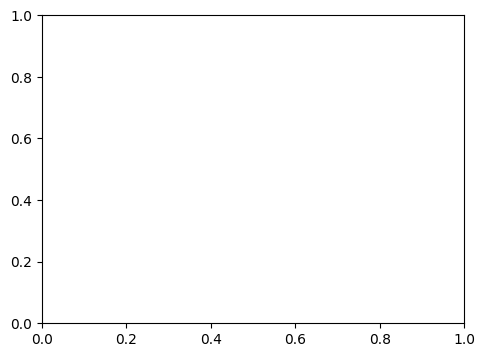

In [28]:
# Plot Training and Validation Loss Curves
plt.figure(figsize=(12, 4))

# Loss curve
plt.subplot(1, 2, 1)
plt.plot(history.epochs, history.history['loss'], label='Training Loss')
plt.plot(history.epochs, history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy curve
plt.subplot(1, 2, 2)
plt.plot(history.epochs, history.history['accuracy'], label='Training Accuracy')
plt.plot(history.epochs, history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
